# 1.Bussiness Problem

## 1.1 Description

 - Source :  https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
 - Data   :  wholesale distributor in Lisbon, Portugal
 - Data Files : Wholesale customers data.csv

## 1.2 Introduction

In this project, a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure is analysed. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the UCI Machine Learning Repository. For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

# 2. Machine Learning Problem Foundation

## 2.1 Data

The customer segments data is included as a selection of 440 data points collected on data found from clients of a wholesale distributor in Lisbon, Portugal. More information can be found on the https://archive.ics.uci.edu/ml/datasets/Wholesale+customers



 - We have one datafile called **customers.csv** which contains the data
 - As it is an unsupervised problem we do not have any target feature or class.
 - Also, We do not need two datasets i.e training and test set   

### 2.2 Dataset Features

1) ***Fresh :***  annual spending (m.u.) on fresh products (Continuous)<br>
2) ***Milk :*** annual spending (m.u.) on milk products (Continuous)<br>
3) ***Grocery :*** annual spending (m.u.) on grocery products (Continuous)<br> 
4) ***Frozen :*** annual spending (m.u.) on frozen products (Continuous)<br>
5) ***Detergents_Paper :*** annual spending (m.u.) on detergents and paper products (Continuous)<br>
6) ***Delicatessen :*** annual spending (m.u.) on and delicatessen products (Continuous)<br>
7) ***Channel :*** {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)<br>
8) ***Region :*** {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal)<br>

# 3. Exploratory Data Analysis

## 3.1 Reading the data

In [1]:
import os
os.chdir("/Users/akash/Downloads/Github Project Datasets")

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import visuals as vs
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Wholesale customers data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 6 features each.


In [5]:
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## 3.2 Data Exploration

In [6]:
# Summary statitics of the data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
# Selecting 5 indices of choice
indices = [47 , 138 , 359]

# Creating dataframes for the chosen sample
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,44466,54259,55571,7782,24171,6465
1,13537,4257,5034,155,249,3271
2,796,5878,2109,340,232,776


**Observation:**
 - The first customer selected could be a SuperMarket (retailer Grocery Store) based on their higher than average purchase costs across all product categories.
 - The second customer chosen appears to be a Restaurant based on their higher than average purchase costs of Fresh food (i.e. greens, fruits, etc), delicatessen (i.e.meats), and lower purchase costs of Frozens, Detergent, and other "Grocery" items.
 - The third customer chosen appears to be a Coffee Shop based on their higher than average purchase costs of Milk and Groceries (i.e. snacks, other ingredients), and lower than average purchase costs of Freshs (i.e. greens, fruits, etc), Frozens, Detergent, and Delicatessen.

## 3.3 Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# So, lets drop the 'Fresh Feature' from the train data and copy it to test data
new_data = data.drop('Fresh' , axis = 1)
labels = data['Fresh']

# Splitting the data in train and test set
X_train,X_test,y_train,y_test = train_test_split(new_data ,labels ,test_size = 0.25 ,random_state = 30)

# Training a Decision Tree Regressor
model = DecisionTreeRegressor(random_state =30)
model.fit(X_train,y_train)

# Checking score of the prediction using the test set
score = model.score(X_test,y_test)
print(score)


-0.03073171639011929


/Users/akash/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Observations**
 - From this result we can infer that the "Fresh" feature is necessary in our dataset, and if it is removed our model will not accurately identify customers' spending habits. This is due to losing relevant information that is not correlated to the remaining features in the dataset, therefore making it very hard to predict based on those remaining feature, as proven by the resulting negative R^2 score.

## 3.4 Visualising Feature Distribution

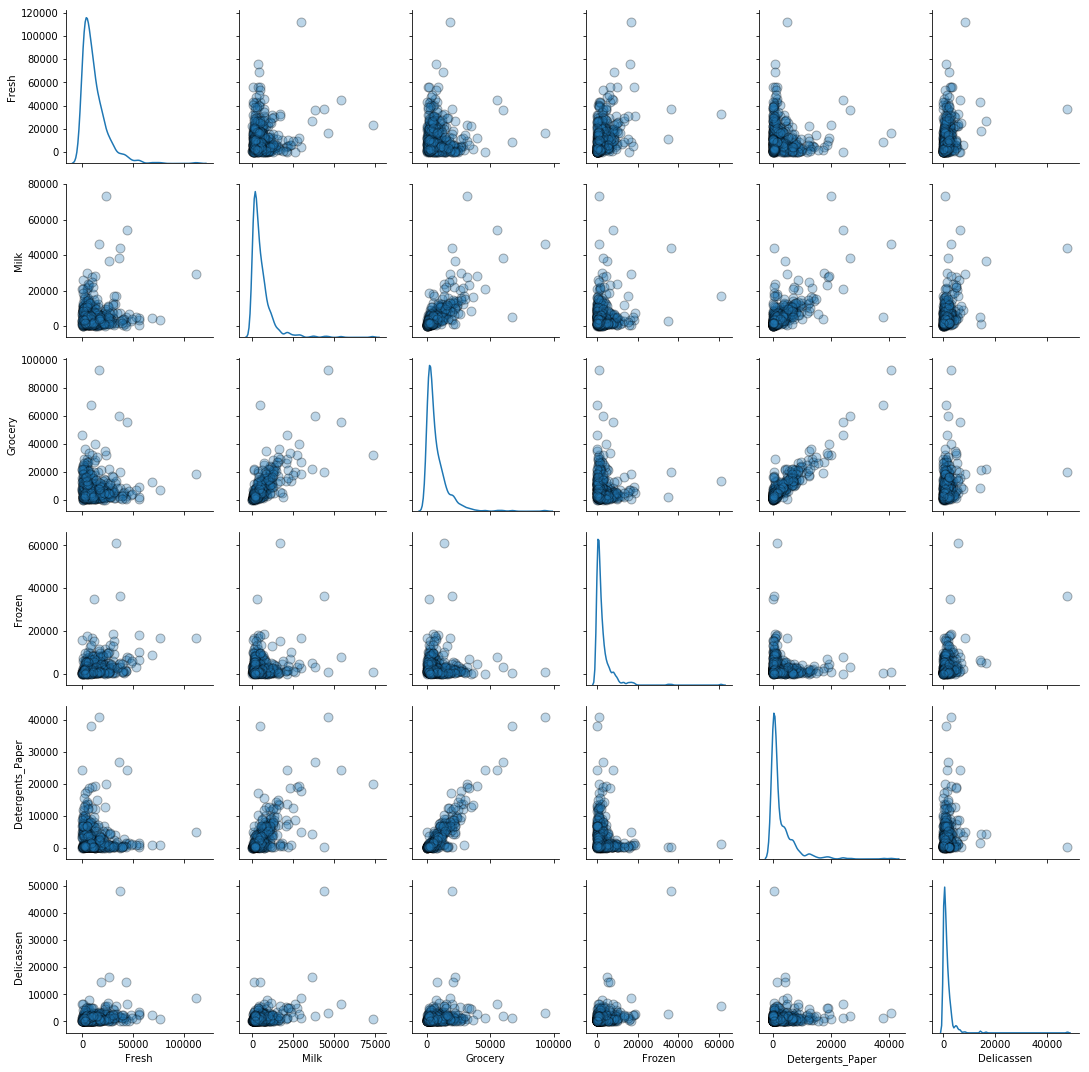

In [9]:
sns.pairplot(data = data, diag_kind= 'kde', plot_kws = {'alpha': 0.3, 's': 80, 'edgecolor': 'k'})

**Observations**
 - From the scatter matrix, it can be observed that that the pair **(Grocery, Detergents_Paper)** seems to have the strongest correlation between the features. The pair **(Grocery, Milk)** also seem to exhibit some degree of correlation. This scatter matrix also confirms that initial suspicions that the "Fresh" product category does not have significant correlations to any of the remaining features and therefore, its information is necessary to accurately predict customers' behavior. Additionally, this scater matrix also show us that the data for these features is highly skewed and not normaly distributed.

## 3.5 Data Preprocessing

Preprocessing the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from your analysis are significant and meaningful.

### Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In [10]:
# Scaling the data using Natural Logarithm
log_data = np.log(data)
log_samples = np.log(samples)

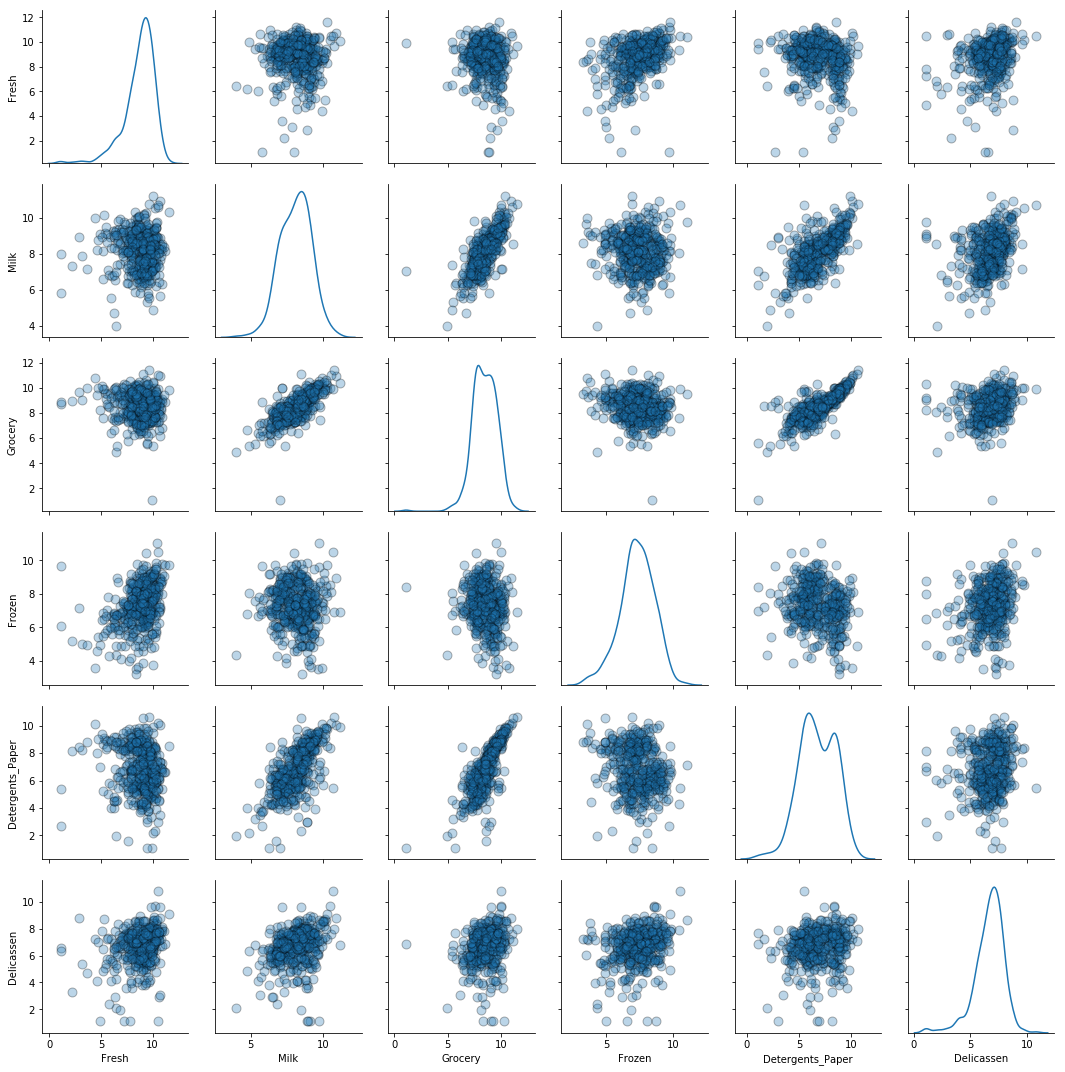

In [11]:
# Pairplot for the log_ata
sns.pairplot(data = log_data, diag_kind= 'kde', plot_kws = {'alpha': 0.3, 's': 80, 'edgecolor': 'k'})

**Observations :**
 - After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. For any pair of features we identified earlier as being correlated are still correlated.

In [12]:
# Displaying the log_transformed samples
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,9.513182,8.356320,8.523970,5.043425,5.517453,8.092851
2,6.679599,8.678972,7.653969,5.828946,5.446737,6.654153


## 3.6 Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, I will use **Tukey's Method** for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered an outliers.

In [13]:
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature] , 25)
    Q3 = np.percentile(log_data[feature] , 75)
    step = (Q3 - Q1) * 1.5
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

outliers  = [65,66,75,128,154]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


**Observations**:
 - Based on the outlier step, there are 42 data points that are considered outliers. However, only a few of these are considered outliers for more than one feature (i.e. indices 65,66,75,128,154). I do not think that all of the outliers should be removed as in total they represent 9.5% of the dataset. Removing the 42 data points could cause us to lose imporant information necessary to correctly classify customer behavior. In fact some of these outliers may actually represent certain customer group behavior. For this reason I only chose to remove the 5 datapoints that are considered outliers in more than one feature to reduce the potential of skewing our results.

## 3.7 Feature Transformation

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

Total Variance from first 2 components: 0.7068172308068137
Total Variance from first 4 components: 0.9310901099509614


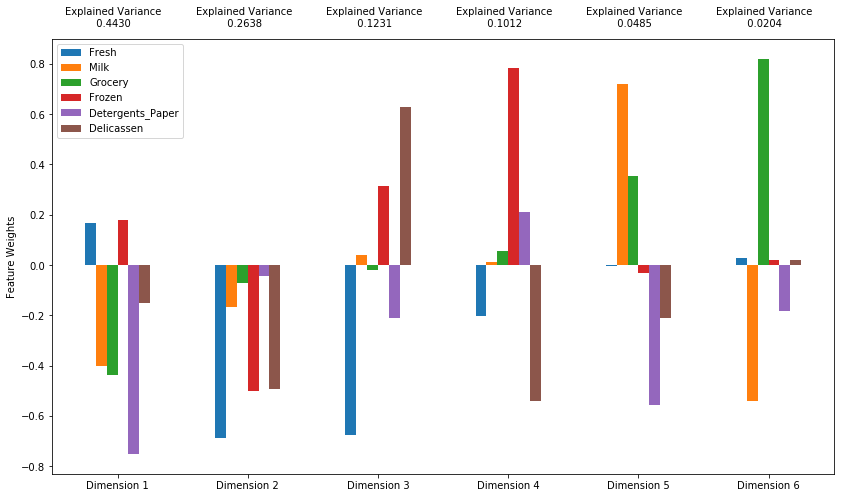

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = len(good_data.columns)).fit(good_data)
pca_samples = pca.transform(log_samples)
explained_variance = pca.explained_variance_ratio_
totl=0
explained_var2 = sum([explained_variance[i] for i in range(2)])
explained_var4 = sum([explained_variance[i] for i in range(4)])
print ('Total Variance from first 2 components:',explained_var2)
print ('Total Variance from first 4 components:',explained_var4)
pca_results = vs.pca_results(good_data, pca)

**Observations**
 - A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the indivdual feature weights.
 - In total, the first and second principal components explain 70.7% of the variance in the data. On the other hand the first 4 components explain 93.1% of the variance in the data.
 - Regarding spending, a customer with higher values on the first dimension would spend much more on Detergents_Paper, also on Milk and Groceries.This could represent a convinience store.
 - A customer with higher values on the second dimension would spend more on Freshs, and relatively equal on Frozen and Delicatessen. This could represent a restaurant.
 - A customer with higher values on the third dimension would spends heavily on Delicatessen, a decent amount on Frozens and really little on Freshs.
 - Finally, a customer with higher fourth dimension values would spend heavily on Milk, some on Detergents_paper, and very little in Grocery. This could represent a coffee shop.


In [15]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551
1,0.3525,-0.0495,-0.0661,-2.9649,0.6829,0.1654
2,0.5383,2.2224,1.2415,-1.0479,0.9276,-0.8047


### Dimensionality Reduction using PCA

In [16]:
# Applying PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
print((pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])))

   Dimension 1  Dimension 2
0      -4.3646      -3.9519
1       0.3525      -0.0495
2       0.5383       2.2224


### Visualising a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

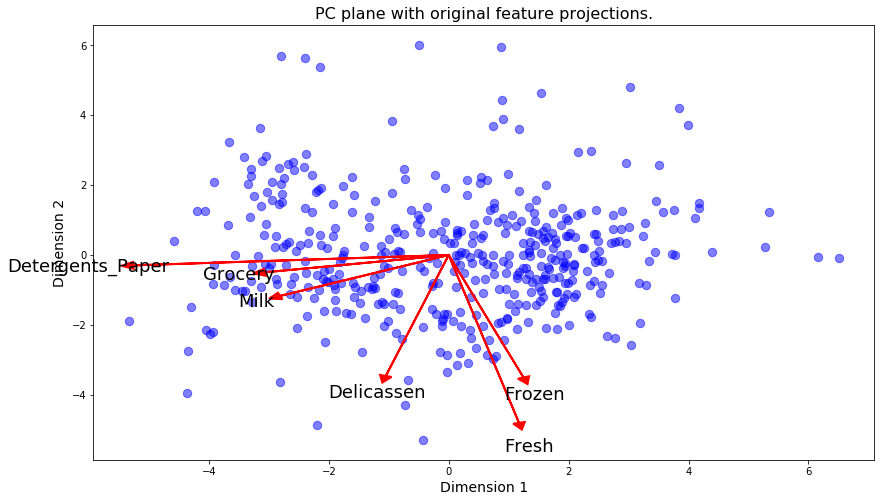

In [18]:
#Create a biplot
vs.biplot(good_data, reduced_data, pca)

**Observations:**
- Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the middle left corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.

# 4. Machine Learning Models

## 4.1 Clustering

So, we can use two clustering algorithms here, K-Means clustering and Gaussian Mixture model.


 - The advantage of **K-means** is the simplicity of its underlying assumptions which allows the algorithm to be robust, reliable and fast. This also allows the model to outperform other algorithms on large datasets. In addition, while K-means always converges(locally or globally) on the K-clusters after a given number of iterations, this algorithm performs best on data that is clearly defined and well sperated.

 - On the other hand, the advantage of a **Gaussian Mixture Model (GMM)** , is its capability of incorporating the covariance between the points into the model to identify more complex clusters. Unlike K-means which assumes, during each iteration, that any given point can only belong to a specific cluster, GMM also takes into account the level of certainty with which a point belongs to a given cluster. This uncertainty is also revised during each iteration making the algorithm more flexible when assigning points to a cluster and capable of performing well on in less clearly defined datasets.

 - From the biplot, it can be observed that the data points are mostly densily packed on an area of the plot but do not form clearly deliniated clusters as certain points seem to be in the border bettween two or more groups. We can also observe that certain dimensions in the data (i.e. Milk-Grocery-Detergents and Fresh-Frozen) have a strong degree of correlation between each other. Based on these facts and on the previous discussion, we can safely conclude that applying a **Gausian Mixture Model** will produce the best outcome for the problem at hand.

### Creating Clusters

Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's **silhouette coefficien**t. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

### Checking for different number of clusters

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for i in range(2,6):
    print("\nWhen number of clusters are {}" .format(i))
    cluster = GaussianMixture(n_components = i).fit(reduced_data)
    preds = cluster.predict(reduced_data)
    score = silhouette_score(reduced_data,preds)
    print('\nsilhouette_score')
    print(score)
    


When number of clusters are 2

silhouette_score
0.4219168464626149

When number of clusters are 3

silhouette_score
0.3742018475403218

When number of clusters are 4

silhouette_score
0.3458671375116742

When number of clusters are 5

silhouette_score
0.31089308011310735


**Observation :**
Based on the scenarios run, the best silhouette score is achieved when using only 2 clusters:
 - For 2 Clusters, Silhouette score = 0.42
 - For 3 Clusters, Silhouette score = 0.40
 - For 4 Clusters, Silhouette score = 0.34
 - For 5 Clusters, Silhouette score = 0.29

**So, we can see that the best score is for 2 clusters**

In [20]:
cluster = GaussianMixture(n_components = 2).fit(reduced_data)
preds = cluster.predict(reduced_data)
centres = cluster.means_
print('centres')
print(centres)
sample_preds = cluster.predict(pca_samples)
score = silhouette_score(reduced_data,preds)
print('\nsilhouette_score')
print(score)

centres
[[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]

silhouette_score
0.4219168464626149


### Cluster Visualisation

So Now that we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results.

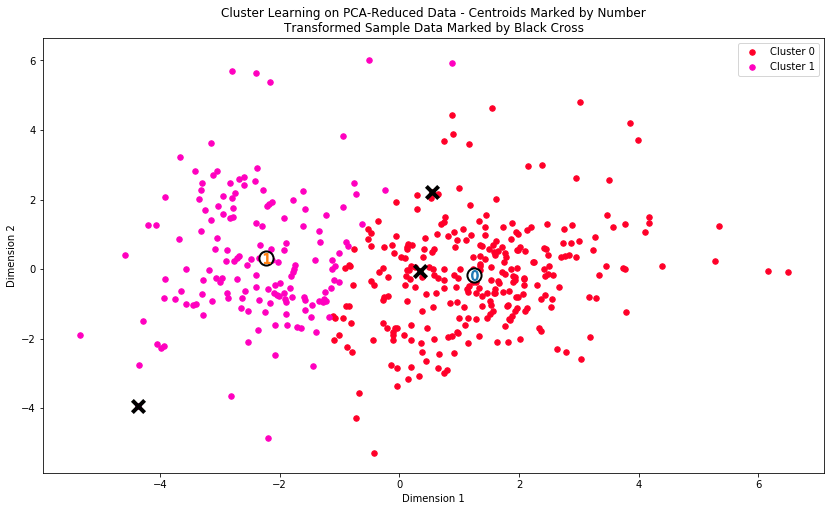

In [21]:
#Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centres, pca_samples)

**Observations :** <br>
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

### Data Recovery

In [22]:
# Inverse transforming the centres
log_centres = pca.inverse_transform(centres)
true_centres = np.exp(log_centres)
# Displaying the true centres
segments = ['Segment {}'.format(i) for i in range(0,len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns = data.keys())
true_centres.index = segments
display(true_centres)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


**Observations :** <br>

A customer assigned to Cluster 0 would most likely represent some type of market/covinience store. This can be concluded based on their consistent purchase costs across the milk, grocery and frozen product categories and higher than average purchase costs of freshs.

On the other hand, a customer assigned to Cluster 1 most likely represents some type of restaurant as they have higher than average or close to average purchase costs of Groceries and Milk and detergent_paper

### Predicting the cluster of the sample predictions

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Observations :**<br>
Sample point 0 is best represented by a Market/Convenience store. Sample points 1 and 2 are best represented as some type of restaurant. This is consistent with the predictions obtained from the clusters

### Conclusion

- By identifying the underlying type of customer segments (through clustering), the wholesaler will be able to draw more meaningfull hypothesis about expected behavior of the customers in each segment prior to performing the A/B test. Then these hypothesis may be tested on each segment separately to find more meaningful conclusions and understand the impact level on each independent customer segment.

 For example, by observing the definitions of these two customer segments, the wholesaler could draw the preliminary hypothesis that "market/convenient store" customers(i.e. cluster 0) and "restaurant" customers (i.e. Cluster 1) will react different to a reduction in number of deliveries. Restaurants will potentially react negatively as they are more concerned with having fresh products to serve their clients. Reducing the number of deliveries to 3 days would force them to increase their inventory levels (if its even possible) and keep produce longer which may increase spoilage of certain producs, and possibly a reduction in the quality of food that they serve their clients. On the other hand, the wholesaler may draw the hypothesis that "markets/convenient store customers" may react positively to the new schedule as they more likely have more inventory space to store the necessary stock to supply their clients. They are also not as concern with "freshness" of their products as a restaurant would be. These hypothesis would then be tested on separate sample groups of customers from each segment to draw final conclusions about the impact to each segment.

 - The wholesale distributor could train a supervised machine learning classification algorithm (e.g. SVC, or decision tree classifier, etc) with the initial dataset's customer product spending as inputs and the customer segments (as obtained from GMM clustering) as the target variable. Once the classifier is trained it can be used to predict the customer segment for new customers which would then determine the most appropriate delivery service (3 days per week or 5 days per week).

 Also, using the predicted segment labels ("engineered features") as inputs for a supervised algorithm provide us with additional domain knowledge. This can enable us to increase the model's performance when making other useful predictions.